<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/04%20Clasificacion_Agrupamiento/1%20Modelos%20Lineales/Notebooks/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="350" src="../img/SVM.jpg"/> <br>Máquinas de Vectores de Soporte</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import modelos_lineales_clasificacion as md
from sklearn import preprocessing
%matplotlib inline

## Para subir carpetas a Colab

In [2]:
#!apt-get install subversion
#!svn checkout "https://github.com/jhermosillo/diplomado_CDD2019/trunk/04%20Clasificacion_Agrupamiento/1%20Modelos%20Lineales/Data/"

## Prueba Perceptrón con Kernel y SVM

In [3]:
"""----------DATOS----------"""
x_train,x_test,y_train,y_test,clases=md.toy_data(tipo='ls',s=100)

"""FEATURES (PERCEPTRON)"""
scaler = preprocessing.StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test =scaler.fit_transform(x_test)

features = preprocessing.PolynomialFeatures(1)
X_train=features.fit_transform(x_train)
X_test=features.fit_transform(x_test)

"""MODELO PERCEPTRON"""
perceptron = md.Perceptron(epocas=30)
perceptron.fit(X_train, y_train)
y_p=perceptron.predict(X_test)

&#9998; **Prueba el modelo del Perceptrón con kernel usando un Kernel Lineal, Polinomial y Gaussiano. Prueba con varios parámetros.**

1 vectores de soporte de 160 puntos


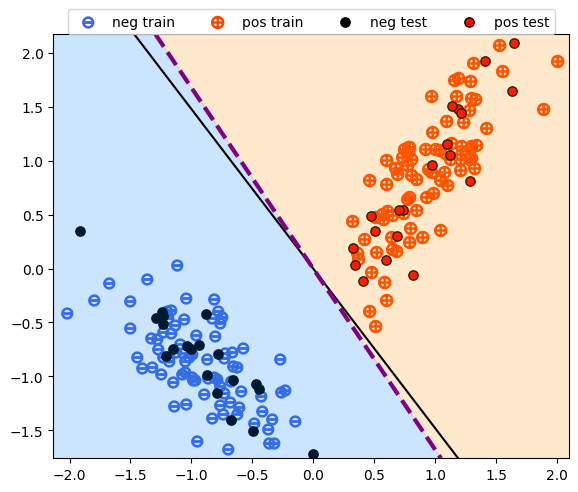

In [4]:
"""PERCEPTRON CON KERNEL"""
X_train=x_train[:]
X_test=x_test[:]

perceptronK = md.PerceptronKernel(kernel='lk')

perceptronK.fit(X_train, y_train)

"""TEST"""
y_p=perceptronK.predict(X_test)

"""FD's"""
fig,ax=md.grafica(x_train,y_train,x_test,y_test)

perceptron.plot_FD(ax)
md.plot_FD(fig,ax,perceptronK)

&#9998; **Prueba la SVM y compárala con otros modelos. Prueba con varios VALORES DEL PARÁMETRO C.**


MÉTRICAS PERCEPTRON:
Exactitud   100.0%
Precision   100.0%
Recall      100.0%
MÉTRICAS PERCEPTRON CON KERNEL:
Exactitud   100.0%
Precision   100.0%
Recall      100.0%

MODELO svm.SVC:
Exactitud   100.0%
Precision   100.0%
Recall   100.0%


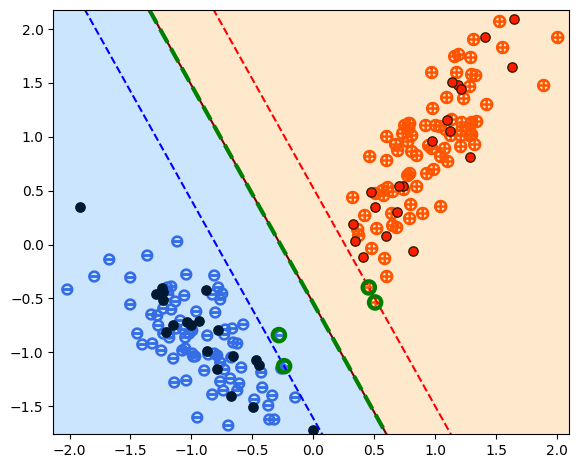

In [5]:
from sklearn import svm 

SVM = svm.SVC(kernel='linear',C=2) #kernel lineal
#clf_svm = svm.SVC(kernel='poly', gamma=3, C=2) #kernel polinomial
# clf=svm.SVC(gamma=0.1,C=10)        #kernel RBF (por default)

# #entrenamiento
SVM.fit(X_train,y_train)

"""FD's"""
fig,ax=md.grafica(x_train,y_train,x_test,y_test)

md.plot_FD_SVM(fig,ax,SVM,SVP=True)
# perceptron.plot_FD(ax)
# md.plot_FD(perceptronK,fig,ax)


ex,pr,rec = perceptron.metricas(y_test,y_p)
print('MÉTRICAS PERCEPTRON:')
print("Exactitud   " + str(ex) + "%")
print("Precision   " + str(pr) + "%")
print("Recall      " + str(rec) + "%")

ex,pr,rec = perceptronK.metricas(y_test,y_p)
print('MÉTRICAS PERCEPTRON CON KERNEL:')
print("Exactitud   " + str(ex) + "%")
print("Precision   " + str(pr) + "%")
print("Recall      " + str(rec) + "%")

import sklearn.metrics as sm
y_p=SVM.predict(X_test)
ex = sm.accuracy_score(y_test, y_p)*100
pr = sm.precision_score(y_test, y_p)*100
pr = sm.recall_score(y_test, y_p)*100

print('\nMODELO svm.SVC:')
print("Exactitud   " + str(ex) + "%")
print("Precision   " + str(pr) + "%")
print("Recall   "    + str(rec) + "%")
ax.get_legend().remove()

## Compara el desempeño de la SVM contra el Perceptron con Kernel

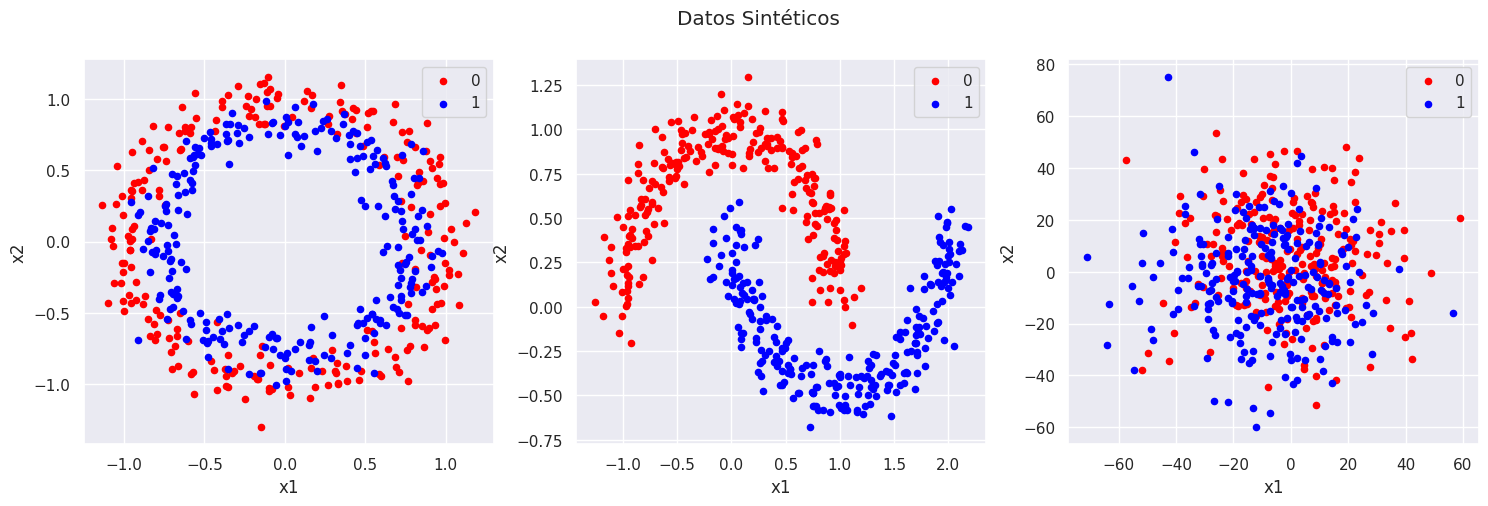

In [6]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

exp_size = 500

# generate 2d classification dataset
X_circ, y_circ = make_circles(n_samples=exp_size, noise=0.1,
                              random_state=1)
X_moon, y_moon = make_moons(n_samples=exp_size, noise=0.1,
                            random_state=1)

# generate 2d multi classification dataset
X_blob, y_blob = make_blobs(n_samples=exp_size, centers=2, cluster_std= 20,
                            n_features=2,random_state=1)

# scatter plot, dots colored by class value
df_circ = DataFrame(dict(x1 = X_circ[:,0], x2=X_circ[:,1], label=y_circ))
df_moon = DataFrame(dict(x1 = X_moon[:,0], x2=X_moon[:,1], label=y_moon))
colors_bin = {0:'red', 1:'blue'}

df_blob = DataFrame(dict(x1 = X_blob[:,0], x2=X_blob[:,1], label=y_blob))
colors_mult = {0:'red', 1:'blue', 2:'green', 3:'purple'}

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
fig.suptitle('Datos Sintéticos')

grouped = df_circ.groupby('label')
for key, group in grouped:
    group.plot(ax=ax1, kind='scatter', x='x1', y='x2', label=key, color=colors_bin[key])

grouped = df_moon.groupby('label')
for key, group in grouped:
    group.plot(ax=ax2, kind='scatter', x='x1', y='x2', label=key, color=colors_bin[key])

grouped = df_blob.groupby('label')
for key, group in grouped:
    group.plot(ax=ax3, kind='scatter', x='x1', y='x2', label=key, color=colors_mult[key])

78 vectores de soporte de 350 puntos


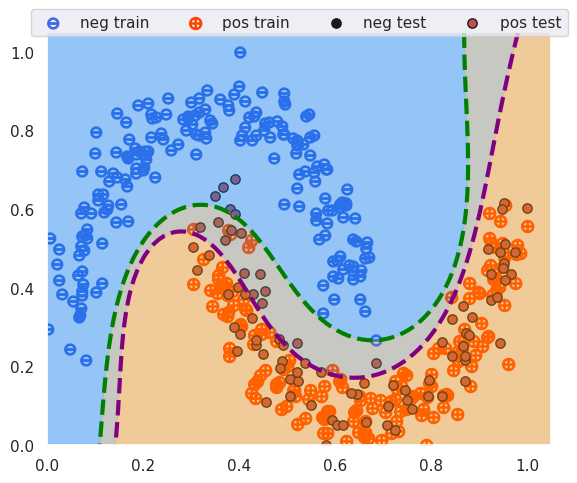

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm

Data=[(X_circ,y_circ),(X_moon,y_moon),(X_blob,y_blob)]
X,y=Data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.StandardScaler()
# scaler = preprocessing.PowerTransformer()

X_train=scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

perceptronK = md.PerceptronKernel(kernel='gk',gamma=1.6,epocas=30)
perceptronK.fit(X_train, y_train)

clf_svm = svm.SVC(kernel='rbf',gamma=1.3, C=100)  #RBF por default
clf_svm.fit(X_train,y_train)


"""FD's"""
fig,ax=md.grafica(X_train,y_train,X_test,y_test)

md.plot_FD(fig,ax,perceptronK,show_SV=False)
md.plot_FD(fig,ax,clf_svm,show_SV=False)

## Búsqueda de parámetros por el método de GridSearch y Cross-Validation

### Corpus de dígitos escritos a mano

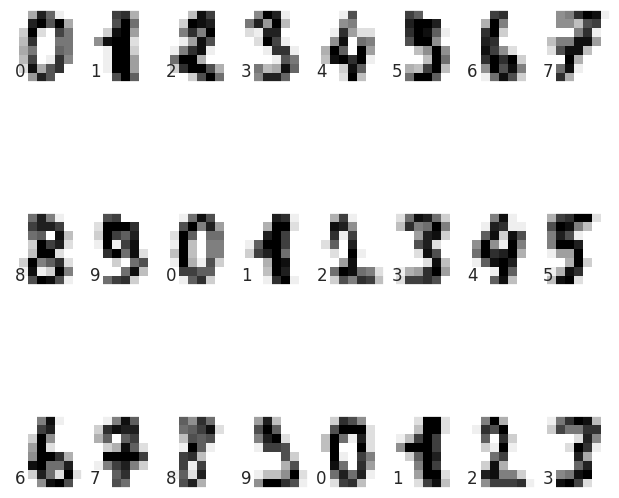

In [8]:
from sklearn import datasets

# Loading the Digits dataset
digits = datasets.load_digits()

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(24):
    ax = fig.add_subplot(3, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Datos de entrenamiento

X:
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
y
[0 1]


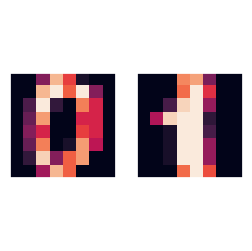

In [9]:
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

print('X:')
print(X[:2])
print('y')
print(y[:2])
fig,ax = plt.subplots(figsize=(3,3))
ax.axis("off")
for i in range(2):
    ax = fig.add_subplot(1,2, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],interpolation='nearest')

### Calibración de los parámetros de una SVM

Se utiliza [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) de sklearn.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro' % score,cv=5)
    clf.fit(X_train, y_train.ravel())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

___

## Clasificación de fraude en Tarjeta de Crédito

#### Para este problema usaremos el datset de Kaggle: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud).

**Contexto**

Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está altamente desequilibrado, la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos. Las características V1, V2, ... V28 son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La función 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La característica 'Cantidad' es la Cantidad de la transacción, esta característica se puede utilizar para el aprendizaje sensible al costo dependiente del ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

### Trabajamos con un archivo comprimido

In [11]:
import pandas as pd
pd.options.mode.chained_assignment = None

from zipfile import ZipFile 

#Descarga local
# archivo = "../Data/CreditCard/creditcard.zip"
#Descarga en Colab
archivo = "Data/CreditCard/creditcard.zip"

print('Extrayendo contenido...') 
with ZipFile(archivo, 'r') as Zip: 
    Zip.extractall() 
    print('fin de extracción.') 

credito = pd.read_csv("creditcard.csv")

Extrayendo contenido...


FileNotFoundError: [Errno 2] No such file or directory: 'Data/CreditCard/creditcard.zip'

### Veamos los datos

In [ ]:
credito.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credito.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


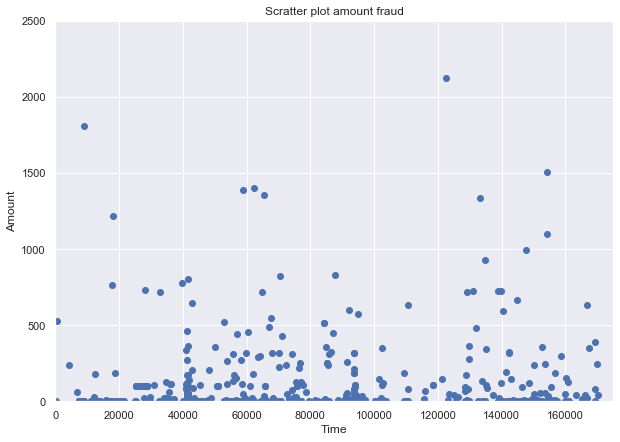

In [ ]:
df_fraud = credito[credito['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(10,7))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

0    284315
1       492
Name: Class, dtype: int64

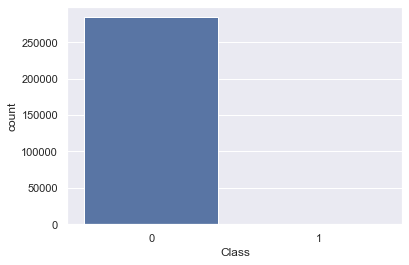

In [ ]:
import seaborn as sns
sns.countplot(x = "Class", data = credito)
credito.loc[:, 'Class'].value_counts()

In [ ]:
No_of_frauds= len(credito[credito["Class"]==1])
No_of_normals = len(credito[credito["Class"]==0])
print("Hay {} transacciones fraudulentas ( Class 1)".format(No_of_frauds))
print("Hay {} transacciones normales ( Class 0)".format(No_of_normals))
total= No_of_frauds + No_of_normals
pf= (No_of_frauds / total)*100
pn= (No_of_normals / total)*100
print("Class 0 porcentage = {}%".format(np.round(pn,2)))
print("Class 1 porcentage = {}%".format(np.round(pf,2)))

Hay 492 transacciones fraudulentas ( Class 1)
Hay 284315 transacciones normales ( Class 0)
Class 0 porcentage = 99.83%
Class 1 porcentage = 0.17%


### Se necesita hacer un submuestreo para balancear las clases

* Está claro que la Clase 1 está subrepresentada ya que solo  representa el 0.17% de todo el conjunto de datos. 
* Si entrenamos nuestro modelo usando este conjunto de datos, el modelo será ineficiente y será entrenado para predecir solo la Clase 0 porque no tendrá suficientes datos de entrenamiento.
* Podemos obtener una alta exactitud al probar el modelo, pero no debemos confundirnos con esto porque nuestro conjunto de datos no tiene datos de prueba equilibrados. Por lo tanto, tenemos que confiar en el recall que se basa en TP y FP.
* En los casos en que tengamos datos asimétricos, agregar datos adicionales de la característica subrepresentada (sobremuestreo) es una opción, mediante laa modelación de la distribución de los datos. Por ahora no tenemos esa opción, así que tendremos que recurrir al submuestreo.
* El submuestreo del conjunto de datos implica mantener todos nuestros datos subrepresentados (Clase 1) mientras se muestrea el mismo número de características de la Clase 0 para crear un nuevo conjunto de datos que comprenda una representación igual de ambas clases.

&#9998; **Obtén un conjunto de datos balanceado** 

In [ ]:
#lista los indices de fraude
fraud_index= np.array(credito[credito["Class"]==1].index)

#lista de indices normales del data set completo
normal_index= credito[credito["Class"]==0].index

#seleccion del numero de indices aleatorias igual al de transacciones fraudulentas
random_normal_indices= np.random.choice(normal_index, No_of_frauds*2, replace= False)
random_normal_indices= np.array(random_normal_indices)

#concatena indices fraudulentos y normales para tener una lista de indices
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])

#usa la lista de indices sub-muestreados para obtener el data frame
undersampled_data= credito.iloc[undersampled_indices, :]

undersampled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


### Comprueba que los datos quedaron balanceados

The number of fraudulent transactions( Class 1) are:  492
The number of normal transactions( Class 0) are:  984
The total number of rows of both classes are:  1476
Class 0 percentage =  66.66666666666666
Class 1 percentage =  33.33333333333333


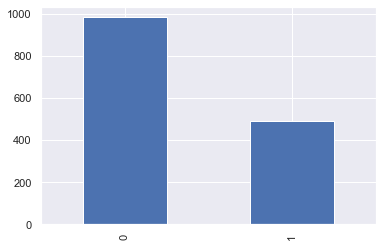

In [ ]:
No_of_frauds_sampled= len(undersampled_data[undersampled_data["Class"]== 1])

No_of_normals_sampled = len(undersampled_data[undersampled_data["Class"]== 0])

print("The number of fraudulent transactions( Class 1) are: ", No_of_frauds_sampled)
print("The number of normal transactions( Class 0) are: ", No_of_normals_sampled)
total_sampled= No_of_frauds_sampled + No_of_normals_sampled
print("The total number of rows of both classes are: ", total_sampled)

Fraud_percent_sampled= (No_of_frauds_sampled / total_sampled)*100
Normal_percent_sampled= (No_of_normals_sampled / total_sampled)*100
print("Class 0 percentage = ", Normal_percent_sampled)
print("Class 1 percentage = ", Fraud_percent_sampled)

#Check the data count now
count_sampled=pd.value_counts(undersampled_data["Class"], sort= True)
count_sampled.plot(kind= 'bar')

### Ahora haremos un proceso llamado [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813)
* Para ello necesitamos instalar la librería de _aprendizaje desequilibrado_ ``imbalanced-learn`` de Python

In [ ]:
# !pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)

0.7.0


### Pre-procesa los datos

In [ ]:
sc= preprocessing.StandardScaler()

undersampled_data.loc[:,"scaled_Amount"]=  undersampled_data["Amount"]
undersampled_data.loc[:,"scaled_Amount"]= sc.fit_transform(\
                                          undersampled_data["scaled_Amount"].\
                                          values.reshape(-1,1))

#dropping time and old amount column
undersampled_data.drop(["Time","Amount"], axis= 1,inplace=True)

undersampled_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.381120
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.435075
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.442623
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.178557
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.377686


### &#9998; **Obtén la matriz de datos $X$ y el vector de clases $y$ correspondiente** 

In [ ]:
X= undersampled_data.loc[:, undersampled_data.columns != "Class"].values

y= undersampled_data.loc[:, undersampled_data.columns == "Class"].values

### **Hagamos el proceso de sobre-muestreo (SMOTE)**

In [ ]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#### Verifiquemos la cantidad de datos ahora

In [ ]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({1: 984, 0: 984})


#### Alternativamente se puede hacer un sobre-muestreo seguido de un sub-muestreo.
* La librería de aprendizaje desequilibrado admite muestreo aleatorio a través de la clase [RandomUnderSampler](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html).
* Podemos actualizar el ejemplo para sobremuestrear primero la clase minoritaria para tener un 1 por ciento del número de ejemplos de la clase mayoritaria (por ejemplo, alrededor de 2800), luego usar un muestreo aleatorio para reducir el número de ejemplos en la clase mayoritaria para tener un 50 por ciento más que el clase minoritaria (por ejemplo, alrededor de 5,000).

In [ ]:
X_alt= credito.loc[:, credito.columns != "Class"].values
y_alt= credito.loc[:, credito.columns == "Class"].values.ravel()

counter = Counter(y_alt)
print(counter)

Counter({0: 284315, 1: 492})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define el pipeline
over = SMOTE(sampling_strategy=0.01)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_alt, y_alt = pipeline.fit_resample(X_alt, y_alt)

counter = Counter(y_alt)
print(counter)

Counter({0: 5686, 1: 2843})


#### **Descomenta las siguientes líneas para probar el método alternativo**

In [ ]:
# X=X_alt[:]
# y=y_alt[:]

### Separa los datos en datos de entrenamiento (75%) y prueba (25%) 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)
print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  1476
X_test:  492
y_train:  1476
y_test:  492


### Elige una SVM y entrénalo con un conjunto de parámetros de tu elección 

In [ ]:
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0,gamma='scale')
classifier.fit(X_train, y_train.ravel())

SVC(C=1, random_state=0)

### Prueba el modelo y observa la matriz de confusión [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

#Predict the class using X_test
y_pred = classifier.predict(X_test)

#cm1 is the confusion matrix 1 which uses the undersampled dataset
CM = confusion_matrix(y_test, y_pred)

print(CM)

print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")

[[241   0]
 [ 31 220]]
The accuracy is 93.69918699186992 %
The recall from the confusion matrix is 87.64940239043824 %


### Aplica cross-validation utilizando [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) para medir el desempeño de tu modelo

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train.ravel(), cv = 5)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)
print("The accuracy of our model in % is betweeen {0} and {1}".format(mean_accuracy-std_accuracy, mean_accuracy+std_accuracy))

The mean accuracy in %:  92.61452130096197
The standard deviation in %  1.1660500152232358
The accuracy of our model in % is betweeen 91.44847128573873 and 93.7805713161852


### Aplica GridSearch para obtener los mejores parámetros para una SVM 

In [ ]:
#applying gridsearchCV to our classifier
#Specifying the parameters in dictionaries to try out different parameters.
#The GridSearchCV will try all the parameters and give us the best parameters

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train.ravel())
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

The best accuracy using gridSearch is 0.9396976637654604
The best parameters for using this model is {'C': 1000, 'kernel': 'linear'}


### Utiliza los mejores parámetros para probar de nuevo tu modelo

In [ ]:
#fitting the model with the best parameters
classifier_with_best_parameters =  SVC(C= best_parameters["C"], kernel= best_parameters["kernel"], random_state= 0)
classifier_with_best_parameters.fit(X_train, y_train.ravel())
#predicting the Class 
y_pred_best_parameters = classifier_with_best_parameters.predict(X_test)
#creating a confusion matrix
#cm2 is the confusion matrix  which uses the best parameters
CM2 = confusion_matrix(y_test, y_pred_best_parameters)
#visualizing the confusion matrix
print(CM2)
print("The accuracy is "+str((CM2[1,1]+CM2[0,0])/(CM2[0,0] + CM2[0,1]+CM2[1,0] + CM2[1,1])*100) + " %")
print("The recall from the confusion matrix is "+ str(CM2[1,1]/(CM2[1,0] + CM2[1,1])*100) + " %")#also printing the confusion matrix 1 for comparison
print(CM)
print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) + " %")

[[235   6]
 [ 22 229]]
The accuracy is 94.3089430894309 %
The recall from the confusion matrix is 91.23505976095618 %
[[241   0]
 [ 31 220]]
The accuracy is 93.69918699186992 %
The recall from the confusion matrix is 87.64940239043824 %


### &#9998; **Prueba el modelo con el data set completo (sesgado)**

In [ ]:
#creating a new dataset to test our model
datanew= credito.copy()

#Now to test the model with the whole dataset
datanew["scaled_Amount"]=  sc.fit_transform(datanew["Amount"].values.reshape(-1,1))

#dropping time and old amount column
datanew= datanew.drop(["Time","Amount"], axis= 1)

#separating the x and y variables to fit our model
X_full= datanew.iloc[:, undersampled_data.columns != "Class"].values

y_full= datanew.iloc[:, undersampled_data.columns == "Class"].values

#splitting the full dataset into training and test set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size= 0.25, random_state= 0)

print("The split of the full dataset is as follows")
print("X_train_full: ", len(X_train_full))
print("X_test_full: ", len(X_test_full))
print("y_train_full: ", len(y_train_full))
print("y_test_full: ", len(y_test_full))

___

In [ ]:
#predicting y_pred_full_dataset
y_pred_full_dataset= classifier_with_best_parameters.predict(X_test_full)

#confusion matrix usign y_test_full and ypred_full
CM3 = confusion_matrix(y_test_full, y_pred_full_dataset)

print(CM3)
print("The accuracy is "+str((CM3[1,1]+CM3[0,0])/(CM3[0,0] + CM3[0,1]+CM3[1,0] + CM3[1,1])*100) + " %")
print("The recall from the confusion matrix is "+ str(CM3[1,1]/(CM3[1,0] + CM3[1,1])*100) + " %")#

___

### Contesta las siguientes preguntas:

* Suponga que está usando un clasificador SVM lineal con un problema de clasificación de 2 clases. Ahora se le han dado los siguientes datos en los que algunos puntos están encerrados en un círculo verde que representan vectores de soporte.
<br>
<img align="left" width="30%" src="../img/test_SVM_SV.jpg"/>

- Si elimina los puntos verdes de los datos. ¿Cambiará la FD?
- Si elimina los otros puntos de los datos. ¿Cambiará la FD?
- ¿Qué quiere decir con error de generalización en términos de SVM?
  - A) A qué distancia está el hiperplano de los vectores de soporte
  - B) Con qué precisión el SVM puede predecir resultados para datos no vistos
  - C) El umbral de error en un SVM
  
- Cuando el parámetro C se establece en infinito, ¿cuál de las siguientes afirmaciones es verdadera?
  - A) El hiperplano óptimo, si existe, será el que separe completamente los datos.
  - B) El clasificador de margen suave separará los datos.
  - C) Ninguna de las anteriores
  
- ¿Qué implica decir un margen duro?
  - A) El SVM permite un error muy bajo en la clasificación.
  - B) El SVM permite una gran cantidad de error en la clasificación.
  - C) Ninguna de las anteriores
  
- Suponga que está usando el kernel RBF en SVM con un alto valor de Gamma. ¿Qué significa esto?
  - A) El modelo consideraría incluso puntos lejanos del hiperplano para modelar
  - B) El modelo consideraría solo los puntos cercanos al hiperplano para modelar
  - C) El modelo no se vería afectado por la distancia de puntos desde el hiperplano para modelar
  - D) Ninguna de las anteriores

- ¿Cuáles de las siguientes son aplicaciones del mundo real de SVM?
  - A) Categorización de texto e hipertexto
  - B) Clasificación de imágenes
  - C) Agrupación de artículos de noticias
  - D) Todo lo anterior